# Airline Dataset
### Exploratory analysis and cleaning


In [1]:
# import your packages you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# use pandas to import the airline skytrax data
airline=pd.read_csv(r'data\airline.csv', sep=',')

In [3]:
#check out the data to see what it looks like
airline.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


In [4]:
#see some statistics about the dataset, mean, standard deviation, min, max ... ect
airline.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,36861.000000,33706.000000,33708.000000,33264.000000,31114.000000,2203.000000,565.000000,39723.000000,41396.000000
mean,6.039527,3.094612,3.319212,2.805886,2.392364,2.736723,2.249558,3.164111,0.533820
std,3.214680,1.405515,1.541307,1.580246,1.704753,1.569073,1.541283,1.523486,0.498861
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,7.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,1.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
#take a look at the columns, their data type and number of values in each column
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
airline_name                     41396 non-null object
link                             41396 non-null object
title                            41396 non-null object
author                           41396 non-null object
author_country                   39805 non-null object
date                             41396 non-null object
content                          41396 non-null object
aircraft                         1278 non-null object
type_traveller                   2378 non-null object
cabin_flown                      38520 non-null object
route                            2341 non-null object
overall_rating                   36861 non-null float64
seat_comfort_rating              33706 non-null float64
cabin_staff_rating               33708 non-null float64
food_beverages_rating            33264 non-null float64
inflight_entertainment_rating    31114 non-null float64
ground_se

In [6]:
# names of columns
airline.columns

Index(['airline_name', 'link', 'title', 'author', 'author_country', 'date',
       'content', 'aircraft', 'type_traveller', 'cabin_flown', 'route',
       'overall_rating', 'seat_comfort_rating', 'cabin_staff_rating',
       'food_beverages_rating', 'inflight_entertainment_rating',
       'ground_service_rating', 'wifi_connectivity_rating',
       'value_money_rating', 'recommended'],
      dtype='object')

1    22098
0    19298
Name: recommended, dtype: int64


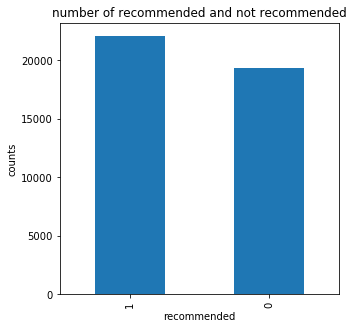

In [7]:
#countplot of recommended (0=no, 1=yes), the dataset seems balanced 
counts = airline.recommended.value_counts()
print(counts)
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
counts.plot.bar(ax = ax)
ax.set_title("number of recommended and not recommended")
ax.set_xlabel("recommended")
ax.set_ylabel("counts")

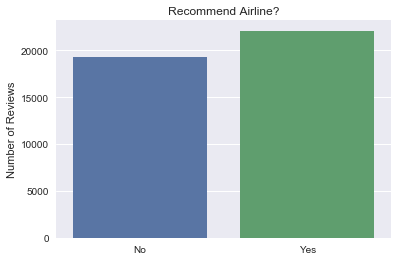

In [8]:
#same plot using seaborn
sns.set(style="darkgrid")
ax=sns.countplot(x='recommended', data=airline)
ax.set_title("Recommend Airline?")
ax.set_xticklabels(["No","Yes"])
ax.set_xlabel(" ")
ax.set_ylabel("Number of Reviews")


In [9]:
new = airline['airline_name'] == 'spirit-airlines'
new = airline[new]
new.recommended.value_counts()

0    786
1    204
Name: recommended, dtype: int64


## the airlines that have the most reviews  ( more than 500)

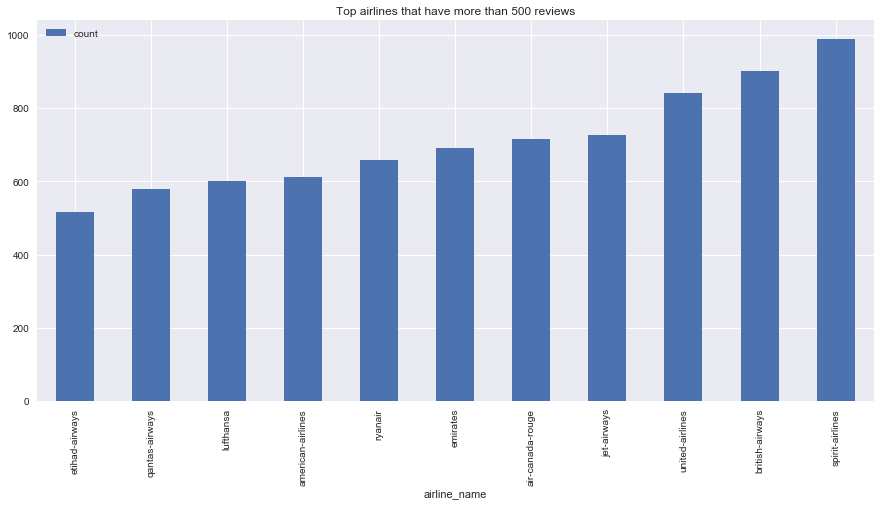

In [10]:
fig, ax = plt.subplots(figsize=(15,7))
group = airline.groupby(['airline_name'])['recommended'].count().reset_index(name='count')
group.sort_values(by='count',inplace=True)
group = group[group['count'] > 500]
ax.set_title('Top airlines that have more than 500 reviews')
group.plot.bar(x='airline_name',y='count',ax=ax)

In [11]:
group.sort_values(by='count',inplace=True)
group

,airline_name,count
145,etihad-airways,515
259,qantas-airways,580
218,lufthansa,600
62,american-airlines,612
269,ryanair,658
140,emirates,691
22,air-canada-rouge,715
188,jet-airways,727
338,united-airlines,840
98,british-airways,901


# counts of each class for top airlines 

In [12]:
names = group.airline_name
new = airline[airline['airline_name'].isin(names)]
new.groupby('airline_name')['recommended'].value_counts()

airline_name       recommended
air-canada-rouge   0              617
                   1               98
american-airlines  0              425
                   1              187
british-airways    1              512
                   0              389
emirates           1              425
                   0              266
etihad-airways     0              303
                   1              212
jet-airways        0              383
                   1              344
lufthansa          1              488
                   0              112
qantas-airways     1              425
                   0              155
ryanair            1              347
                   0              311
spirit-airlines    0              786
                   1              204
united-airlines    0              633
                   1              207
Name: recommended, dtype: int64

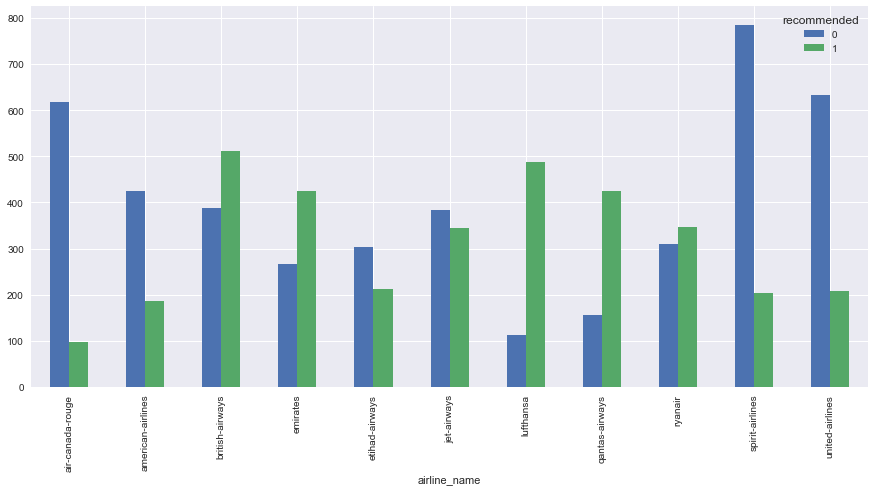

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
new.groupby('airline_name').recommended.value_counts().unstack().plot.bar(ax=ax)


# the airlines that have the most positive reviews  ( more than 300)

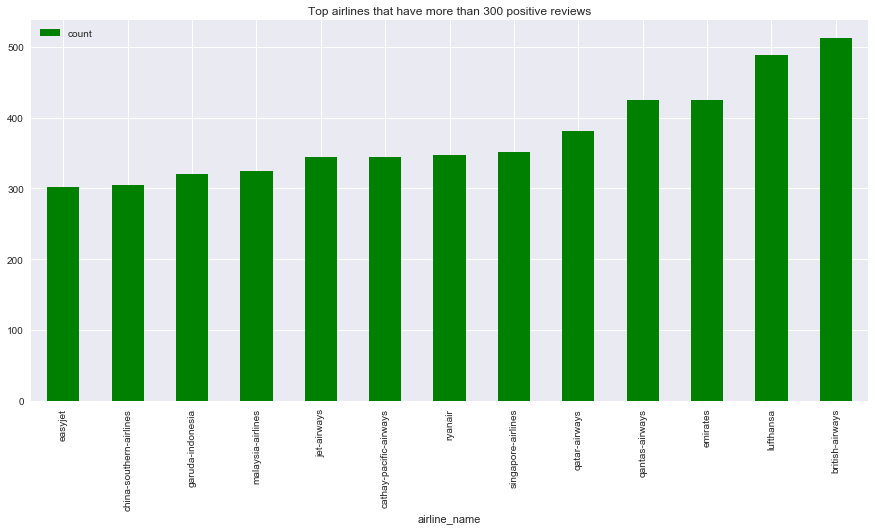

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
group_pos = airline.groupby(['airline_name'])['recommended'].sum().reset_index(name='count')
group_pos.sort_values(by='count',inplace=True)
group_pos = group_pos[group_pos['count'] > 300]
ax.set_title('Top airlines that have more than 300 positive reviews')
group_pos.plot.bar(x='airline_name',y='count',ax=ax,color="g")

In [15]:
group_pos.sort_values(by='count',inplace=True)
group_pos

,airline_name,count
136,easyjet,302
115,china-southern-airlines,305
160,garuda-indonesia,321
221,malaysia-airlines,324
188,jet-airways,344
109,cathay-pacific-airways,345
269,ryanair,347
285,singapore-airlines,352
261,qatar-airways,381
259,qantas-airways,425


In [16]:
# see the correlation bewtween features
airline.corr().style.background_gradient()

# we can see that there's a strong correlation between "overall_rating" and "recommended", that means if the customer gives 
# a good overall rating there is a good chance that he will recommend the airline,
# there's also a good correlation between "value_money_rating" and "recommended"

# there's also some other correlations that will help us define the features to keep,
# we can remove "inflight_entertainment_rating" and "food_beverages_rating"
# because they have a weak correlation with all other features

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
overall_rating,1,0.728189,0.783109,0.631869,0.426236,0.811191,0.701533,0.823802,0.86743
seat_comfort_rating,0.728189,1,0.632507,0.574653,0.451124,0.686958,0.6982,0.717872,0.663565
cabin_staff_rating,0.783109,0.632507,1,0.647838,0.414727,0.720623,0.638248,0.736419,0.731703
food_beverages_rating,0.631869,0.574653,0.647838,1,0.541272,0.667472,0.689462,0.622211,0.596815
inflight_entertainment_rating,0.426236,0.451124,0.414727,0.541272,1,0.619019,0.774285,0.452249,0.416305
ground_service_rating,0.811191,0.686958,0.720623,0.667472,0.619019,1,0.654608,0.769188,0.75273
wifi_connectivity_rating,0.701533,0.6982,0.638248,0.689462,0.774285,0.654608,1,0.679016,0.68039
value_money_rating,0.823802,0.717872,0.736419,0.622211,0.452249,0.769188,0.679016,1,0.792479
recommended,0.86743,0.663565,0.731703,0.596815,0.416305,0.75273,0.68039,0.792479,1


In [17]:
# subset the data to just the variables we need, remove variables that have no correlation with the "recommended" column,
# or columns that have few observations like "ground_service_rating"
# and columns that has no effect on the rating, like 'link', 'title', 'author', 'author_country', 'date',
# 'aircraft', 'type_traveller', 'route'

airline=airline[['content','seat_comfort_rating','cabin_staff_rating','overall_rating','value_money_rating','recommended']]
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 6 columns):
content                41396 non-null object
seat_comfort_rating    33706 non-null float64
cabin_staff_rating     33708 non-null float64
overall_rating         36861 non-null float64
value_money_rating     39723 non-null float64
recommended            41396 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ MB


In [18]:
# see the correlation bewtween the new features
airline.corr().style.background_gradient()

,seat_comfort_rating,cabin_staff_rating,overall_rating,value_money_rating,recommended
seat_comfort_rating,1,0.632507,0.728189,0.717872,0.663565
cabin_staff_rating,0.632507,1,0.783109,0.736419,0.731703
overall_rating,0.728189,0.783109,1,0.823802,0.86743
value_money_rating,0.717872,0.736419,0.823802,1,0.792479
recommended,0.663565,0.731703,0.86743,0.792479,1


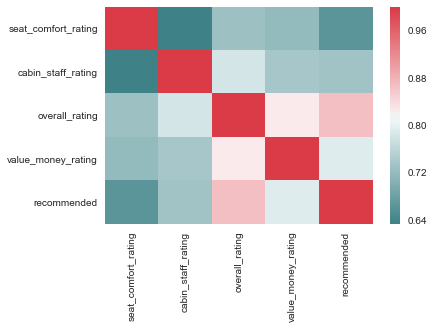

In [19]:
# correlation map using seaborn
corr = airline.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(200, 10, as_cmap=True))

In [20]:
# we have missing data for several of these variables so we will need to drop them
airline = airline.dropna()

In [21]:
# the new data after removing the missing data
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30671 entries, 0 to 41217
Data columns (total 6 columns):
content                30671 non-null object
seat_comfort_rating    30671 non-null float64
cabin_staff_rating     30671 non-null float64
overall_rating         30671 non-null float64
value_money_rating     30671 non-null float64
recommended            30671 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [22]:
#information about our dataset , see the number of unique values of each feature
airline.nunique().sort_values()

recommended                2
seat_comfort_rating        6
cabin_staff_rating         6
value_money_rating         6
overall_rating            10
content                30650
dtype: int64

In [23]:
#check out the new dataset after cleaning 
airline.head()

,content,seat_comfort_rating,cabin_staff_rating,overall_rating,value_money_rating,recommended
0,Outbound flight FRA/PRN A319. 2 hours 10 min f...,4.0,4.0,7.0,4.0,1
1,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,4.0,5.0,10.0,5.0,1
2,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,5.0,5.0,9.0,5.0,1
3,Adria serves this 100 min flight from Ljubljan...,4.0,4.0,8.0,4.0,1
4,WAW-SKJ Economy. No free snacks or drinks on t...,4.0,2.0,4.0,2.0,0


In [24]:
# function to get the sentiment of each text
def sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 1 if polarity > 0.1 else 0

In [25]:
#adding a new column to the dataset, it contains the sentiment of each review
airline['sentiment'] = airline.content.apply(sentiment)

In [26]:
# number of positive and negative sentiment in the dataset
airline.sentiment.value_counts()

1    18285
0    12386
Name: sentiment, dtype: int64

In [27]:
# taking a look at the dataset after adding the sentiment column
airline.head()

,content,seat_comfort_rating,cabin_staff_rating,overall_rating,value_money_rating,recommended,sentiment
0,Outbound flight FRA/PRN A319. 2 hours 10 min f...,4.0,4.0,7.0,4.0,1,1
1,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,4.0,5.0,10.0,5.0,1,1
2,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,5.0,5.0,9.0,5.0,1,1
3,Adria serves this 100 min flight from Ljubljan...,4.0,4.0,8.0,4.0,1,1
4,WAW-SKJ Economy. No free snacks or drinks on t...,4.0,2.0,4.0,2.0,0,1


In [28]:
# check the correlation between "sentiment" and "recommended",
# not a very strong correlation but later we'll see when use it in the classification

airline.sentiment.corr(airline.recommended)

0.62096300211983901

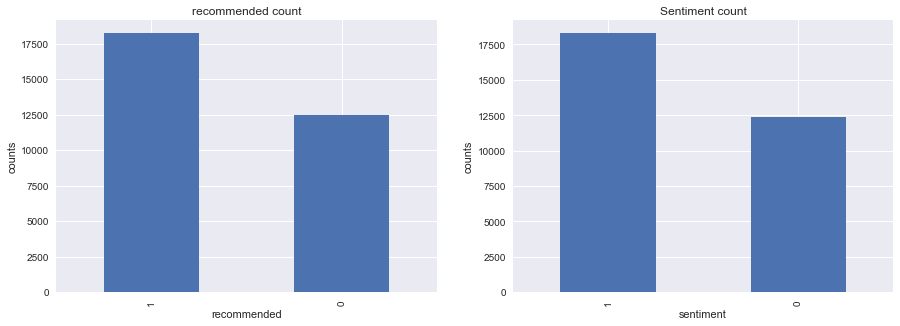

In [29]:
#plotting the count of recommended and sentiment to have an idea about them
counts_recommended = airline.recommended.value_counts()
counts_sentiment = airline.sentiment.value_counts()
fig, (ax1, ax2)= plt.subplots(1,2)
fig.set_size_inches(15,5)
counts_recommended.plot.bar(ax = ax1)
ax1.set_title("recommended count")
ax1.set_xlabel("recommended")
ax1.set_ylabel("counts")
counts_sentiment.plot.bar(ax = ax2)
ax2.set_title("Sentiment count")
ax2.set_xlabel("sentiment")
ax2.set_ylabel("counts")

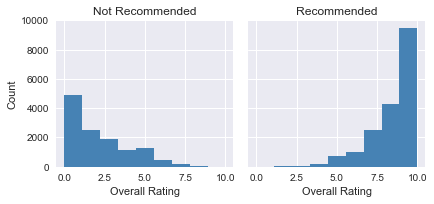

In [30]:
#rating by recommend or not. This is obviously expected, the overall rating is correlated with the recommendation
sns.set(style="darkgrid")
g = sns.FacetGrid(airline, col="recommended", margin_titles=True)
bins = np.linspace(0, 10, 10)
g.map(plt.hist, "overall_rating", color="steelblue", bins=bins)
axes = g.axes.flatten()
axes[0].set_title("Not Recommended")
axes[1].set_title("Recommended")
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Overall Rating")

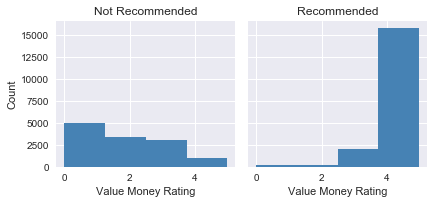

In [31]:
# rating by value money rated. This is also expected, if the user thinks he had the value of his money he will generally 
# recommend the airline
g = sns.FacetGrid(airline, col="recommended", margin_titles=True)
bins = np.linspace(0, 5, 5)
g.map(plt.hist, "value_money_rating", color="steelblue", bins=bins)
axes = g.axes.flatten()
axes[0].set_title("Not Recommended")
axes[1].set_title("Recommended")
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Value Money Rating")

# Training the Classifiers

##### Train/Test Split

This test size is 20% of the dataset and the training set is the rest 80% 

In [32]:
#Split data into train/test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(airline, airline['recommended'], test_size=0.2)

print('training set: '  + str(len(x_train)))
print('test set: '+ str(len(x_test)))


training set: 24536
test set: 6135


###### Importing necessary packages

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### we will try these classifiers to see how they perform on all the features

In [36]:
used_features = ['seat_comfort_rating','cabin_staff_rating','overall_rating','value_money_rating','sentiment']

Classifiers = [
    BaggingClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    LinearSVC(),
    AdaBoostClassifier(),
    MLPClassifier(),
    KNeighborsClassifier()]

names = [
    'Bagging',
    'Random Forest',
    'Decision Tree',
    'Logistic Regression',
    'SVM',
    'Adaboost',
    'Neural Network',
    'KNN']

for classifier, name in zip(Classifiers,names):
    model = classifier.fit(x_train[used_features],y_train)
    pred = model.predict(x_test[used_features])
    accuracy = accuracy_score(pred,y_test)
    f1 = f1_score(pred,y_test)
    print( name +' ------> Accuracy: ' +str(accuracy)) 

Bagging ------> Accuracy: 0.941483292584
Random Forest ------> Accuracy: 0.943439282804
Decision Tree ------> Accuracy: 0.940831295844
Logistic Regression ------> Accuracy: 0.945884270579
SVM ------> Accuracy: 0.945721271394
Adaboost ------> Accuracy: 0.948818255909
Neural Network ------> Accuracy: 0.948818255909
KNN ------> Accuracy: 0.941320293399


### as the results are pretty close, we're going to keep just 4 classifiers to carry the rest of our work

##### the 4 classifiers we're going to use: Logistic regression ,SVM, Adaboost, Neural Network

In [37]:
Classifiers = [
    LogisticRegression(),
    LinearSVC(),
    AdaBoostClassifier(),
    MLPClassifier()] 

###### function to train the four classifiers and print the accuracy of each one of them

In [38]:
def train(used_features):
    Accuracy=[]
    Model=['Logistic Regression', 'SVM', 'AdaBoost', 'Neural Network']
    for classifier,name in zip(Classifiers,Model):
        model = classifier.fit(x_train[used_features],y_train)
        pred = model.predict(x_test[used_features])
        accuracy = accuracy_score(pred,y_test)
        f1 = f1_score(pred,y_test)
        Accuracy.append(accuracy)
        print('Accuracy of '+ name +' is '+str(accuracy * 100)) 
        print('Confusion Matrix\n')
        print(pd.DataFrame(confusion_matrix(pred, y_test, labels=[1, 0]), index=['true:1', 'true:0'], columns=['pred:1', 'pred:0']))
        print('\n')
        print(classification_report(pred, y_test))
        print('----------------------------------------------------------')
    for i in range(len(Accuracy)):
        Accuracy[i] *= 100
    return Accuracy,Model

###### function to plot the results


In [39]:
def plot(Accuracy,Model):
    Index = [1,2,3,4]
    plt.rcParams["figure.figsize"] = [10,5]
    plt.bar(Index,Accuracy,width= 0.3,linewidth=1,color=['red','blue','orange','purple'])
    plt.xticks(Index, Model,rotation=50)
    plt.ylabel('Accuracy', fontsize=15)
    plt.yticks(np.arange(0,101,10))
    plt.xlabel('Model', fontsize=15)
    plt.title('Accuracies of Models', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)

## First combination:  Using all features

Accuracy of Logistic Regression is 94.5884270579
Confusion Matrix

        pred:1  pred:0
true:1    3456     182
true:0     150    2347


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2497
           1       0.96      0.95      0.95      3638

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.95      0.95      0.95      6135

----------------------------------------------------------
Accuracy of SVM is 94.5721271394
Confusion Matrix

        pred:1  pred:0
true:1    3453     180
true:0     153    2349


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2502
           1       0.96      0.95      0.95      3633

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.95      0.95      0.95      6135

---------------------------

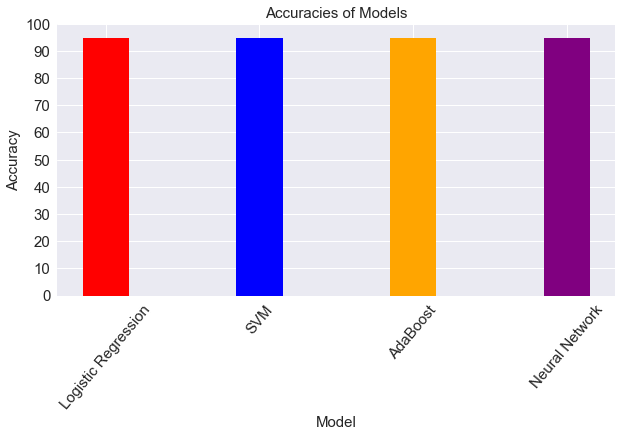

In [40]:
used_features = ['seat_comfort_rating','cabin_staff_rating','overall_rating','value_money_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Second combination: removing "sentiment"

Accuracy of Logistic Regression is 94.6862265689
Confusion Matrix

        pred:1  pred:0
true:1    3453     173
true:0     153    2356


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2509
           1       0.96      0.95      0.95      3626

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.95      0.95      6135
weighted avg       0.95      0.95      0.95      6135

----------------------------------------------------------
Accuracy of SVM is 94.7025264874
Confusion Matrix

        pred:1  pred:0
true:1    3453     172
true:0     153    2357


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2510
           1       0.96      0.95      0.96      3625

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.95      0.95      6135
weighted avg       0.95      0.95      0.95      6135

---------------------------

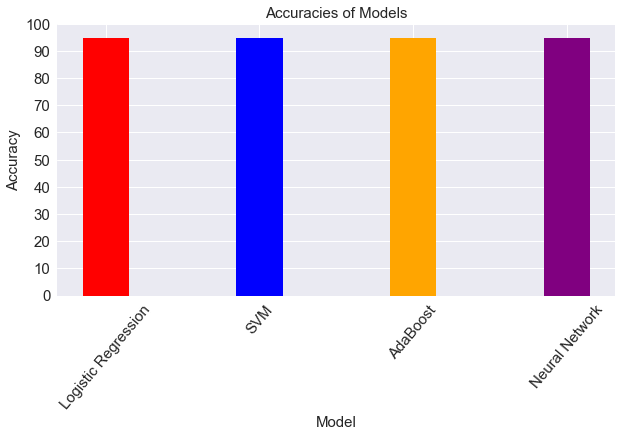

In [41]:
used_features = ['seat_comfort_rating','cabin_staff_rating','overall_rating','value_money_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## Third combination: removing "seat_comfort_rating"


Accuracy of Logistic Regression is 94.6373268134
Confusion Matrix

        pred:1  pred:0
true:1    3451     174
true:0     155    2355


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2510
           1       0.96      0.95      0.95      3625

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.95      0.94      6135
weighted avg       0.95      0.95      0.95      6135

----------------------------------------------------------
Accuracy of SVM is 94.6536267319
Confusion Matrix

        pred:1  pred:0
true:1    3450     172
true:0     156    2357


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2513
           1       0.96      0.95      0.95      3622

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.95      0.94      6135
weighted avg       0.95      0.95      0.95      6135

---------------------------

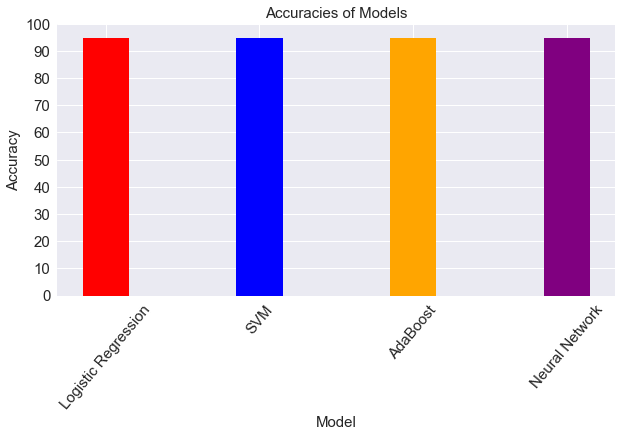

In [42]:
used_features = ['cabin_staff_rating','overall_rating','value_money_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Fourth combination: removing "overall_rating" 

Accuracy of Logistic Regression is 91.9152404238
Confusion Matrix

        pred:1  pred:0
true:1    3397     287
true:0     209    2242


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2451
           1       0.94      0.92      0.93      3684

   micro avg       0.92      0.92      0.92      6135
   macro avg       0.91      0.92      0.92      6135
weighted avg       0.92      0.92      0.92      6135

----------------------------------------------------------
Accuracy of SVM is 91.7196414018
Confusion Matrix

        pred:1  pred:0
true:1    3384     286
true:0     222    2243


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2465
           1       0.94      0.92      0.93      3670

   micro avg       0.92      0.92      0.92      6135
   macro avg       0.91      0.92      0.91      6135
weighted avg       0.92      0.92      0.92      6135

---------------------------

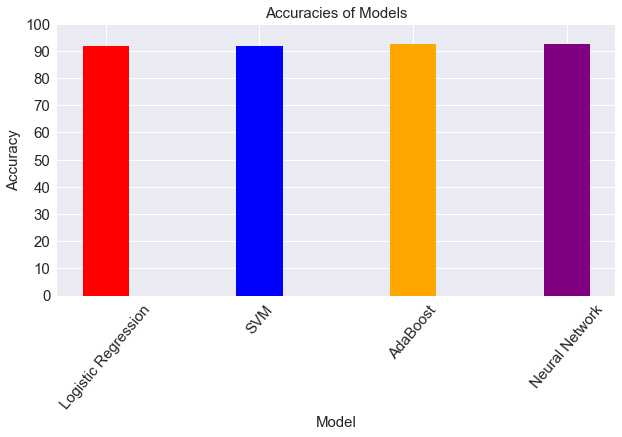

In [43]:
used_features = ['seat_comfort_rating','cabin_staff_rating','value_money_rating','sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Fifth combination: using only "overall_rating"

Accuracy of Logistic Regression is 94.7025264874
Confusion Matrix

        pred:1  pred:0
true:1    3424     143
true:0     182    2386


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2568
           1       0.95      0.96      0.95      3567

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.95      0.94      0.95      6135
weighted avg       0.95      0.95      0.95      6135

----------------------------------------------------------
Accuracy of SVM is 94.7025264874
Confusion Matrix

        pred:1  pred:0
true:1    3424     143
true:0     182    2386


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2568
           1       0.95      0.96      0.95      3567

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.95      0.94      0.95      6135
weighted avg       0.95      0.95      0.95      6135

---------------------------

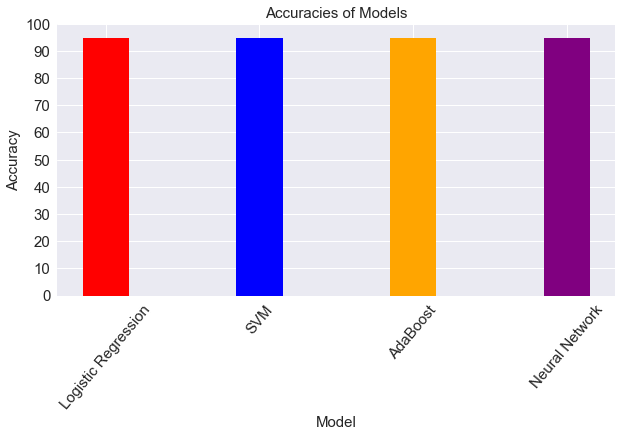

In [44]:
used_features = ['overall_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## Sixth combination: Using only "sentiment"

Accuracy of Logistic Regression is 80.717196414
Confusion Matrix

        pred:1  pred:0
true:1    3022     599
true:0     584    1930


              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2514
           1       0.84      0.83      0.84      3621

   micro avg       0.81      0.81      0.81      6135
   macro avg       0.80      0.80      0.80      6135
weighted avg       0.81      0.81      0.81      6135

----------------------------------------------------------
Accuracy of SVM is 80.717196414
Confusion Matrix

        pred:1  pred:0
true:1    3022     599
true:0     584    1930


              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2514
           1       0.84      0.83      0.84      3621

   micro avg       0.81      0.81      0.81      6135
   macro avg       0.80      0.80      0.80      6135
weighted avg       0.81      0.81      0.81      6135

-----------------------------

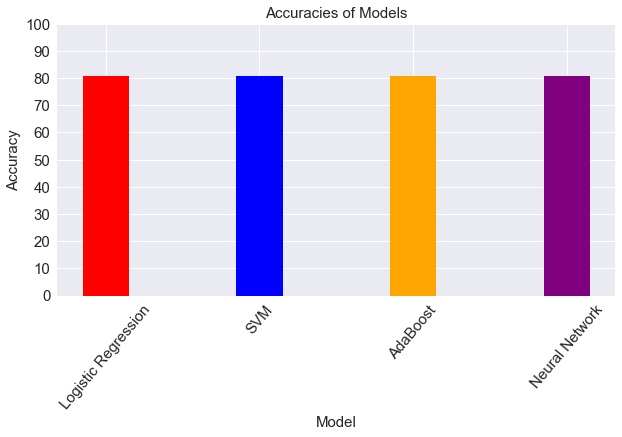

In [45]:
used_features = ['sentiment']
acc, models = train(used_features=used_features)
plot(acc, models)

## Seventh combination: Using "overall_rating" and "money_value_rating"

Accuracy of Logistic Regression is 94.3765281174
Confusion Matrix

        pred:1  pred:0
true:1    3460     199
true:0     146    2330


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2476
           1       0.96      0.95      0.95      3659

   micro avg       0.94      0.94      0.94      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.94      0.94      0.94      6135

----------------------------------------------------------
Accuracy of SVM is 94.3765281174
Confusion Matrix

        pred:1  pred:0
true:1    3460     199
true:0     146    2330


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2476
           1       0.96      0.95      0.95      3659

   micro avg       0.94      0.94      0.94      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.94      0.94      0.94      6135

---------------------------

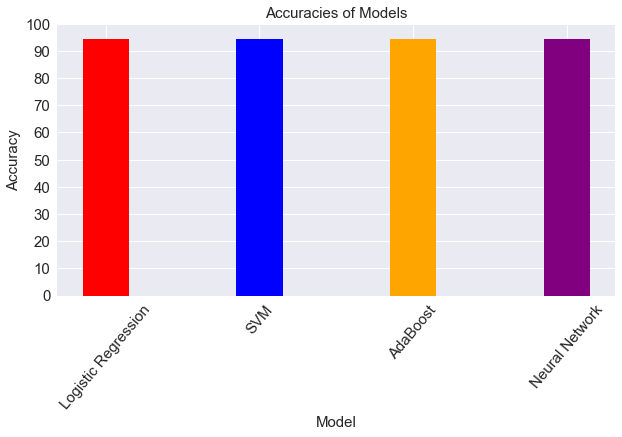

In [46]:
used_features = ['overall_rating','value_money_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## Eighth combination: Using "overall_rating" and "seat_comfort_rating"

Accuracy of Logistic Regression is 94.5558272209
Confusion Matrix

        pred:1  pred:0
true:1    3429     157
true:0     177    2372


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2549
           1       0.95      0.96      0.95      3586

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.95      0.95      0.95      6135

----------------------------------------------------------
Accuracy of SVM is 94.5558272209
Confusion Matrix

        pred:1  pred:0
true:1    3429     157
true:0     177    2372


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2549
           1       0.95      0.96      0.95      3586

   micro avg       0.95      0.95      0.95      6135
   macro avg       0.94      0.94      0.94      6135
weighted avg       0.95      0.95      0.95      6135

---------------------------

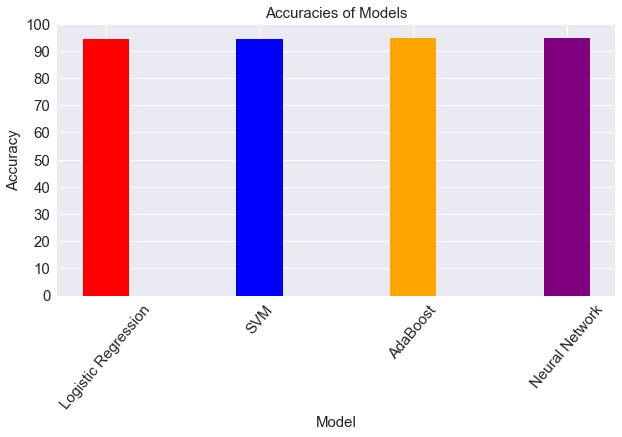

In [47]:
used_features = ['overall_rating','seat_comfort_rating']
acc, models = train(used_features=used_features)
plot(acc, models)

## The best model is : combination 2 (removing sentiment), with Adaboost, so we will use this to classify a new example

In [48]:
used_features = ['seat_comfort_rating','cabin_staff_rating','overall_rating','value_money_rating']
model = AdaBoostClassifier().fit(x_train[used_features],y_train)

# now you can give your ratings in the following cell

In [50]:
seat_comfort_rating = int(input('seat comfort rating: '))
cabin_staff_rating = int(input('cabin staff rating: '))
overall_rating = int(input('overall rating: '))
value_money_rating = int(input('value money rating: '))

d = {'seat_comfort_rating':[seat_comfort_rating],
     'cabin_staff_rating': [cabin_staff_rating],
     'overall_rating': [overall_rating],
     'value_money_rating': [value_money_rating]}
df = pd.DataFrame(data=d)
df = df[used_features]
np.asscalar(model.predict(df))

seat comfort rating: 4
cabin staff rating: 4
overall rating: 7
value money rating: 4


1

## as you can see the result is 1, which means the user will recommend this airline, lets try with another example

In [51]:
seat_comfort_rating = int(input('seat comfort rating: '))
cabin_staff_rating = int(input('cabin staff rating: '))
overall_rating = int(input('overall rating: '))
value_money_rating = int(input('value money rating: '))

d = {'seat_comfort_rating':[seat_comfort_rating],
     'cabin_staff_rating': [cabin_staff_rating],
     'overall_rating': [overall_rating],
     'value_money_rating': [value_money_rating]}
df = pd.DataFrame(data=d)
df = df[used_features]
np.asscalar(model.predict(df))

seat comfort rating: 3
cabin staff rating: 3
overall rating: 3
value money rating: 3


0

## as you can see here the result is 0, which means the user will not recommend the airline,if you want to try another example just run the cell again, and enter your ratings in the end you will see the results